# Belajar Web Scraping
**Nama:** Benony Gabriel <br>
**NIM:** 105222002

**Sumber Belajar:** <br>
1. Pengenalan <a href="https://www.sekawanmedia.co.id/blog/web-scraping/"> Web Scraping </a>
2. Praktek Web Scraping dengan <a href="https://www.youtube.com/watch?v=UOsRrxMKJYk"> Selenium </a>

## Pengantar
Web scraping berperan penting dalam melakukan riset pasar, kompetitor dan mencari leads. Selain berperan dalam dunia bisnis, web scraping juga memiliki peran di bidang lain seperti dalam pengambilan data, market place dan lainnya. Pada dasarnya, web scraping adalah proses pengambilan sebuah dokumen semi-terstruktur  dari  internet,  umumnya  berupa  halaman-halaman  web  dalam  bahasa  markup  seperti  HTML  atau XHTML,  dan  menganalisis  dokumen  tersebut untuk  diambil data  tertentu  dari  halaman  tersebut  untuk  digunakan  bagi kepentingan  lain,  serta banyak  penelitian yang  menggunakan tools  scraping  untuk mengumpulkan  datanya dari  web. (*Sumber: <a href="https://www.sekawanmedia.co.id/blog/web-scraping/">web-scraping</a>*)

### Defenisi Web Scraping
Web Scraping adalah teknik untuk mengekstraksi data dari World Wide Web (WWW) dan menyimpannya ke file sistem atau basis data untuk dijadikan analisis data. Web Scraping dapat dilakukan baik secara manual oleh seorang pengguna atau secara otomatis oleh bot atau crawler web. Proses Web Scraping dari Internet dapat dibagi menjadi dua langkah berurutan, yaitu mengakuisisi sumber daya web dan kemudian mengekstraksi informasi yang diinginkan dari data yang diperoleh. Secara khusus, program Web Scraping dimulai dengan meminta HTTP untuk memperoleh sumber daya dari yang ditargetkan oleh situs web. Permintaan ini dapat diformat kedalam URL yang berisi permintaan GET atau HTTP yang berisi POST. (*Sumber: <a href="https://www.sekawanmedia.co.id/blog/web-scraping/">web-scraping</a>*)

### Manfaat Web Scraping
- Mendapatkan Leads
- Mendalami Kebutuhan Konsumen dari Kompetitor
- Optimasi Harga Produk maupun Layanan
- Mencari Informasi
- Memantau Berita dan Konten

## Praktek Web Scraping
**Web Target:** <a href="https://www.adamchoi.co.uk/teamgoals/detailed">www.adamchoi.co.uk</a>

### Langkah-Langkah:

#### 1. Import Library dan Membuat Driver

In [34]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd

website = "https://www.adamchoi.co.uk/overs/detailed"
path = "D:/Dev Tools/chromedriver-win64/chromedriver.exe"

# Membuat objek Service dengan path ke chromedriver
service = Service(executable_path=path)
driver = webdriver.Chrome(service=service)  # Menjalankan driver dengan service

driver.get(website)



#### 2. Menklik Tombol dengan Selenium

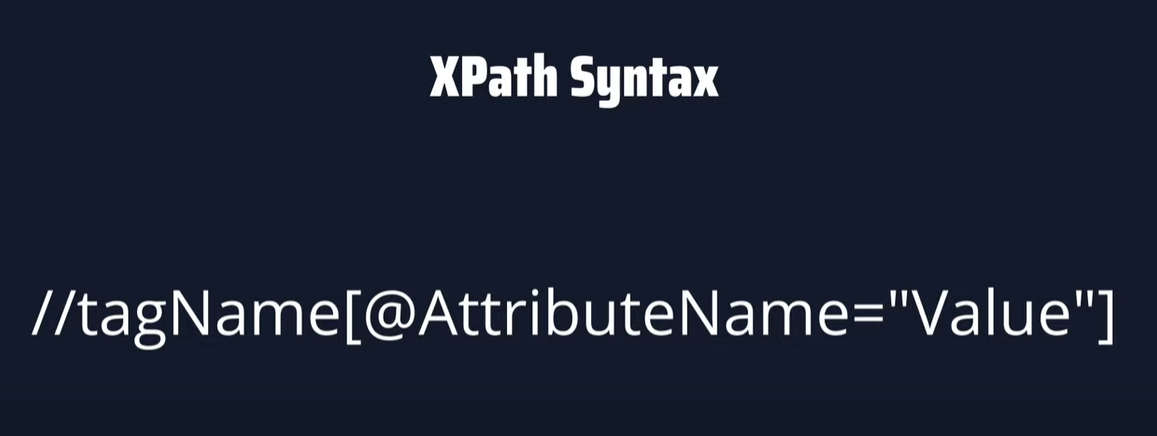

In [35]:
# all_matches_button = driver.find_element(By.XPATH, "//label[@analytics-event='All matches']") # ini untuk season 2024/2025
# all_matches_button = driver.find_element(By.XPATH, "//*[@id='page-wrapper']/div/home-away-selector/div/div/div/div/label[2]")
# all_matches_button.click()



try:
    # Mencari dan mengklik tombol "Accept" atau "Close" pada pesan cookie
    close_button = driver.find_element(By.CLASS_NAME, "cc_message")
    close_button.click()
except NoSuchElementException:
    # Jika tidak ada pesan cookie, lanjutkan saja
    pass

# Lanjutkan dengan mengklik tombol "All matches"
all_matches_button = driver.find_element(By.XPATH, "//*[@id='page-wrapper']/div/home-away-selector/div/div/div/div/label[2]") # untuk menampilkan all matches
all_matches_button.click()
season_21_22_button = driver.find_element(By.XPATH, "//*[@id='season']/option[4]") # menampilkan matches pada season 2021/2022
season_21_22_button.click()


#### 3. Extract Data dari Tabel

In [36]:
# Tunggu sampai semua elemen 'tr' terdeteksi
matches = WebDriverWait(driver, 10).until(EC.presence_of_all_elements_located((By.TAG_NAME, "tr")))

date = []
home_team = []
score = []
away_team = []

for match in matches:
    try:
        # Mendapatkan elemen 'td' dalam 'tr'
        columns = match.find_elements(By.TAG_NAME, "td")
        
        # Periksa apakah ada minimal 4 kolom dalam baris tersebut
        if len(columns) >= 4:
            date.append(columns[0].text)
            home_team.append(columns[1].text)
            score.append(columns[2].text)
            away_team.append(columns[3].text)
            print(f"Date: {columns[0].text}, Home: {columns[1].text}, Score: {columns[2].text}, Away: {columns[3].text}")
    except Exception as e:
        print("Error occurred:", e)
        continue

driver.quit()

Date: 13-08-2021, Home: Brentford, Score: 2 - 0, Away: Arsenal
Date: 22-08-2021, Home: Arsenal, Score: 0 - 2, Away: Chelsea
Date: 28-08-2021, Home: Man City, Score: 5 - 0, Away: Arsenal
Date: 11-09-2021, Home: Arsenal, Score: 1 - 0, Away: Norwich
Date: 18-09-2021, Home: Burnley, Score: 0 - 1, Away: Arsenal
Date: 26-09-2021, Home: Arsenal, Score: 3 - 1, Away: Tottenham
Date: 02-10-2021, Home: Brighton, Score: 0 - 0, Away: Arsenal
Date: 18-10-2021, Home: Arsenal, Score: 2 - 2, Away: Crystal Palace
Date: 22-10-2021, Home: Arsenal, Score: 3 - 1, Away: Aston Villa
Date: 30-10-2021, Home: Leicester, Score: 0 - 2, Away: Arsenal
Date: 07-11-2021, Home: Arsenal, Score: 1 - 0, Away: Watford
Date: 20-11-2021, Home: Liverpool, Score: 4 - 0, Away: Arsenal
Date: 27-11-2021, Home: Arsenal, Score: 2 - 0, Away: Newcastle
Date: 02-12-2021, Home: Man United, Score: 3 - 2, Away: Arsenal
Date: 06-12-2021, Home: Everton, Score: 2 - 1, Away: Arsenal
Date: 11-12-2021, Home: Arsenal, Score: 3 - 0, Away: Southa

#### 4. Export Data to CSV File with Pandas

In [37]:
df = pd.DataFrame({"date":date, "home_team":home_team, "score":score, "away_team":away_team})
df.to_csv("football_dataset.csv", index=False)
print(df)

           date  home_team  score away_team
0    13-08-2021  Brentford  2 - 0   Arsenal
1    22-08-2021    Arsenal  0 - 2   Chelsea
2    28-08-2021   Man City  5 - 0   Arsenal
3    11-09-2021    Arsenal  1 - 0   Norwich
4    18-09-2021    Burnley  0 - 1   Arsenal
..          ...        ...    ...       ...
755  30-04-2022     Wolves  0 - 3  Brighton
756  07-05-2022    Chelsea  2 - 2    Wolves
757  11-05-2022     Wolves  1 - 5  Man City
758  15-05-2022     Wolves  1 - 1   Norwich
759  22-05-2022  Liverpool  3 - 1    Wolves

[760 rows x 4 columns]


### Kesimpulan

Dalam praktik web scraping ini, saya berhasil mengekstrak data pertandingan dari sebuah situs web menggunakan Selenium. Proses ini melibatkan beberapa langkah penting:

1. **Inisialisasi WebDriver**: Saya memulai dengan mengonfigurasi WebDriver untuk mengendalikan browser dan membuka halaman yang diinginkan.
   
2. **Menangani Pop-up**: Saya menangani situasi di mana pop-up cookie muncul dengan mencoba mengklik tombol "Accept" atau "Close" jika tersedia. Jika tidak, proses tetap berlanjut tanpa gangguan.

3. **Navigasi dan Pencarian Elemen**: Saya menavigasi ke elemen yang relevan dengan menggunakan metode pencarian yang tepat, seperti `find_elements()` untuk menemukan tabel pertandingan yang terdiri dari elemen `<tr>`.

4. **Ekstraksi Data**: Dengan menggunakan XPath, saya berhasil mengekstrak informasi penting seperti tanggal pertandingan, tim tuan rumah, skor, dan tim tamu. Data ini kemudian disimpan dalam list terpisah untuk masing-masing kategori.

5. **Penyimpanan Data**: Setelah ekstraksi data, saya menyimpannya dalam format CSV, yang merupakan format umum untuk pengolahan data dan memudahkan analisis lebih lanjut.